In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

# Datadict

1. Churn = 1 if customer cancelled service, 0 if not
2. AccountWeeks = number of weeks customer has had active account
3. ContractRenewal = 1 if customer recently renewed contract, 0 if not
4. DataPlan = 1 if customer has data plan, 0 if not
5. DataUsage = gigabytes of monthly data usage
6. CustServCalls = number of calls into customer service
7. DayMins = average daytime minutes per month
8. DayCalls = average number of daytime calls
9. MonthlyCharge = average monthly bill
10. OverageFee = largest overage fee in last 12 months

# Getting familiar with the data

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
df.shape

(3333, 11)

In [4]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
df.groupby('AccountWeeks')['Churn'].count().sort_values(ascending=False).head(20)

AccountWeeks
105    43
87     42
101    40
93     40
90     39
95     38
86     38
116    37
100    37
112    36
107    36
99     36
123    35
120    35
127    35
88     34
106    34
122    34
94     33
92     33
Name: Churn, dtype: int64

In [8]:
df.groupby('AccountWeeks')['Churn'].count().sort_values(ascending=True).head(20)

AccountWeeks
243    1
175    1
188    1
191    1
199    1
200    1
202    1
208    1
215    1
26     1
221    1
232    1
2      1
4      1
5      1
8      1
225    2
186    2
195    2
6      2
Name: Churn, dtype: int64

<AxesSubplot:>

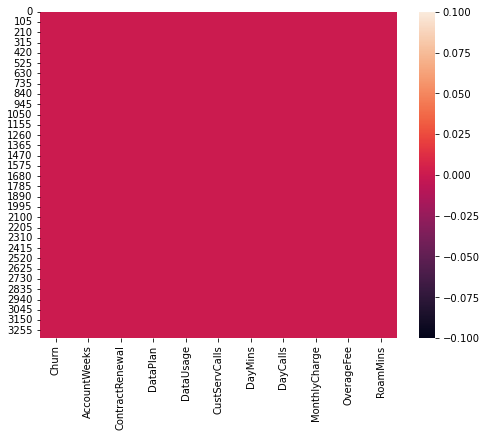

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

# Exploratory Data Analysis

Text(0, 0.5, 'Count')

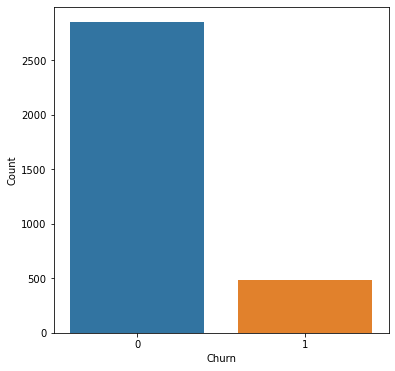

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(df['Churn'])
plt.xlabel('Churn')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

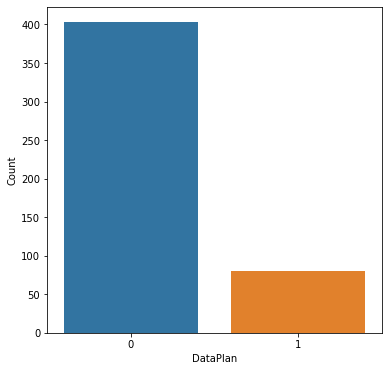

In [11]:
plt.figure(figsize=(6,6))
df_default = df[df['Churn']==1]
sns.countplot(df_default['DataPlan'])
plt.xlabel('DataPlan')
plt.ylabel('Count')

<AxesSubplot:xlabel='ContractRenewal', ylabel='count'>

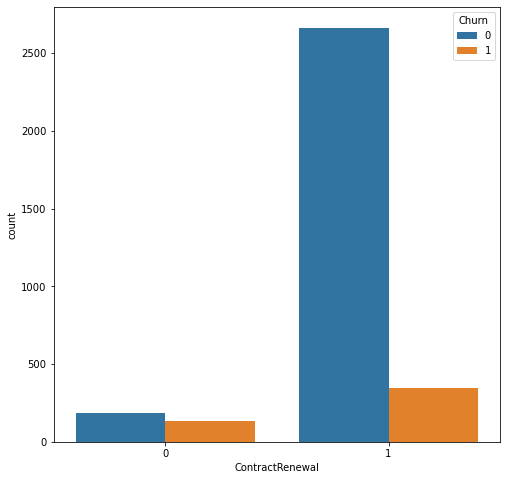

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='ContractRenewal', hue='Churn')

<AxesSubplot:xlabel='DataPlan', ylabel='count'>

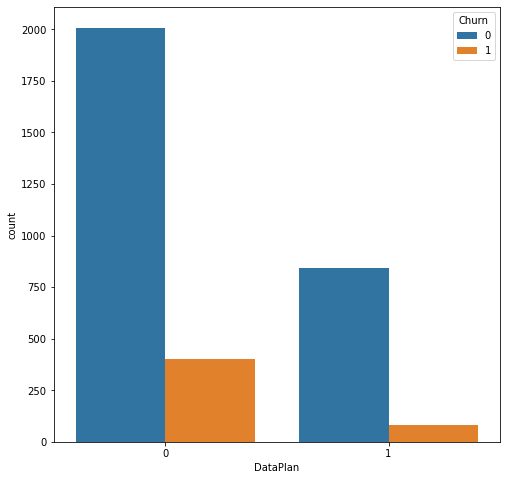

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='DataPlan', hue='Churn')

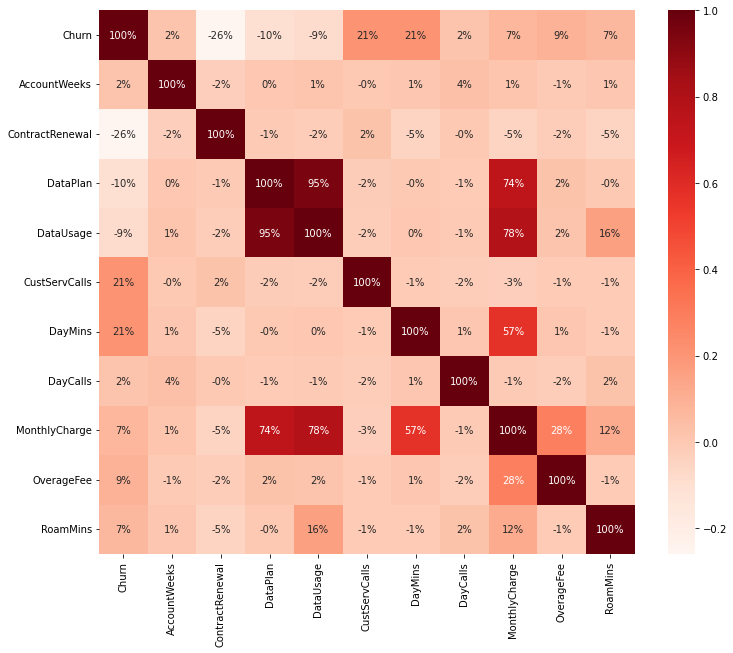

In [14]:
ax = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

In [15]:
# Use "Spearman correlation" for the "Churn" column
print("Spearman Correlations with Churn")
print(df.corr(method="spearman")["Churn"])

Spearman Correlations with Churn
Churn              1.000000
AccountWeeks       0.015583
ContractRenewal   -0.259852
DataPlan          -0.102148
DataUsage         -0.102080
CustServCalls      0.136657
DayMins            0.170677
DayCalls           0.026311
MonthlyCharge      0.094655
OverageFee         0.088582
RoamMins           0.060850
Name: Churn, dtype: float64


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

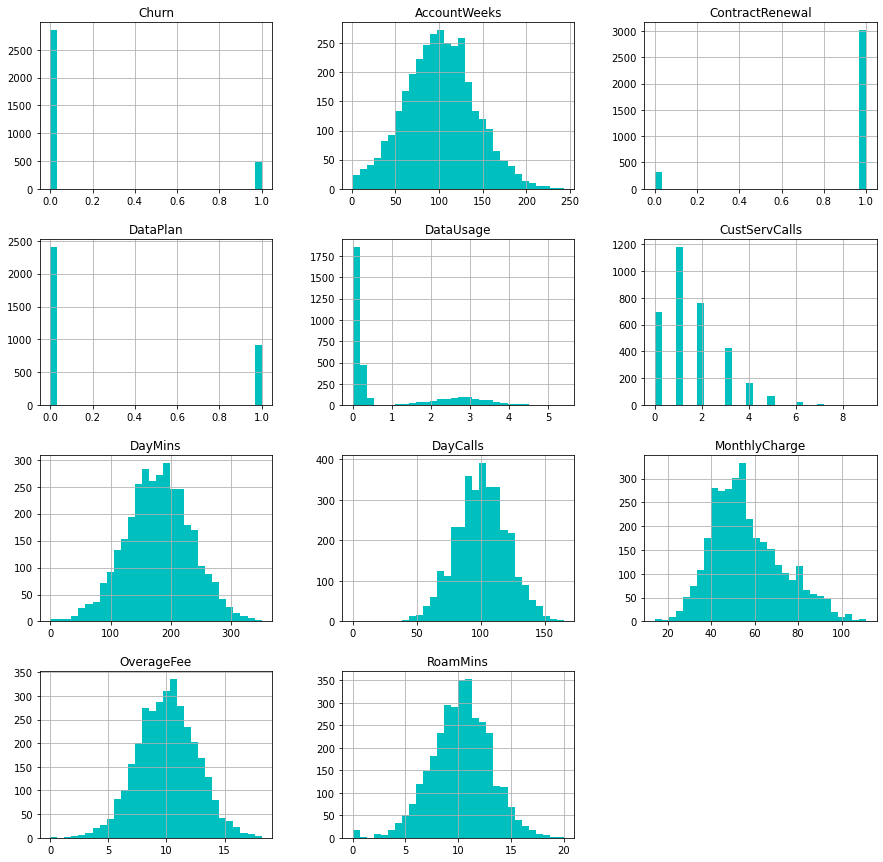

In [16]:
df.hist(figsize=(15,15), bins=30, color='c')

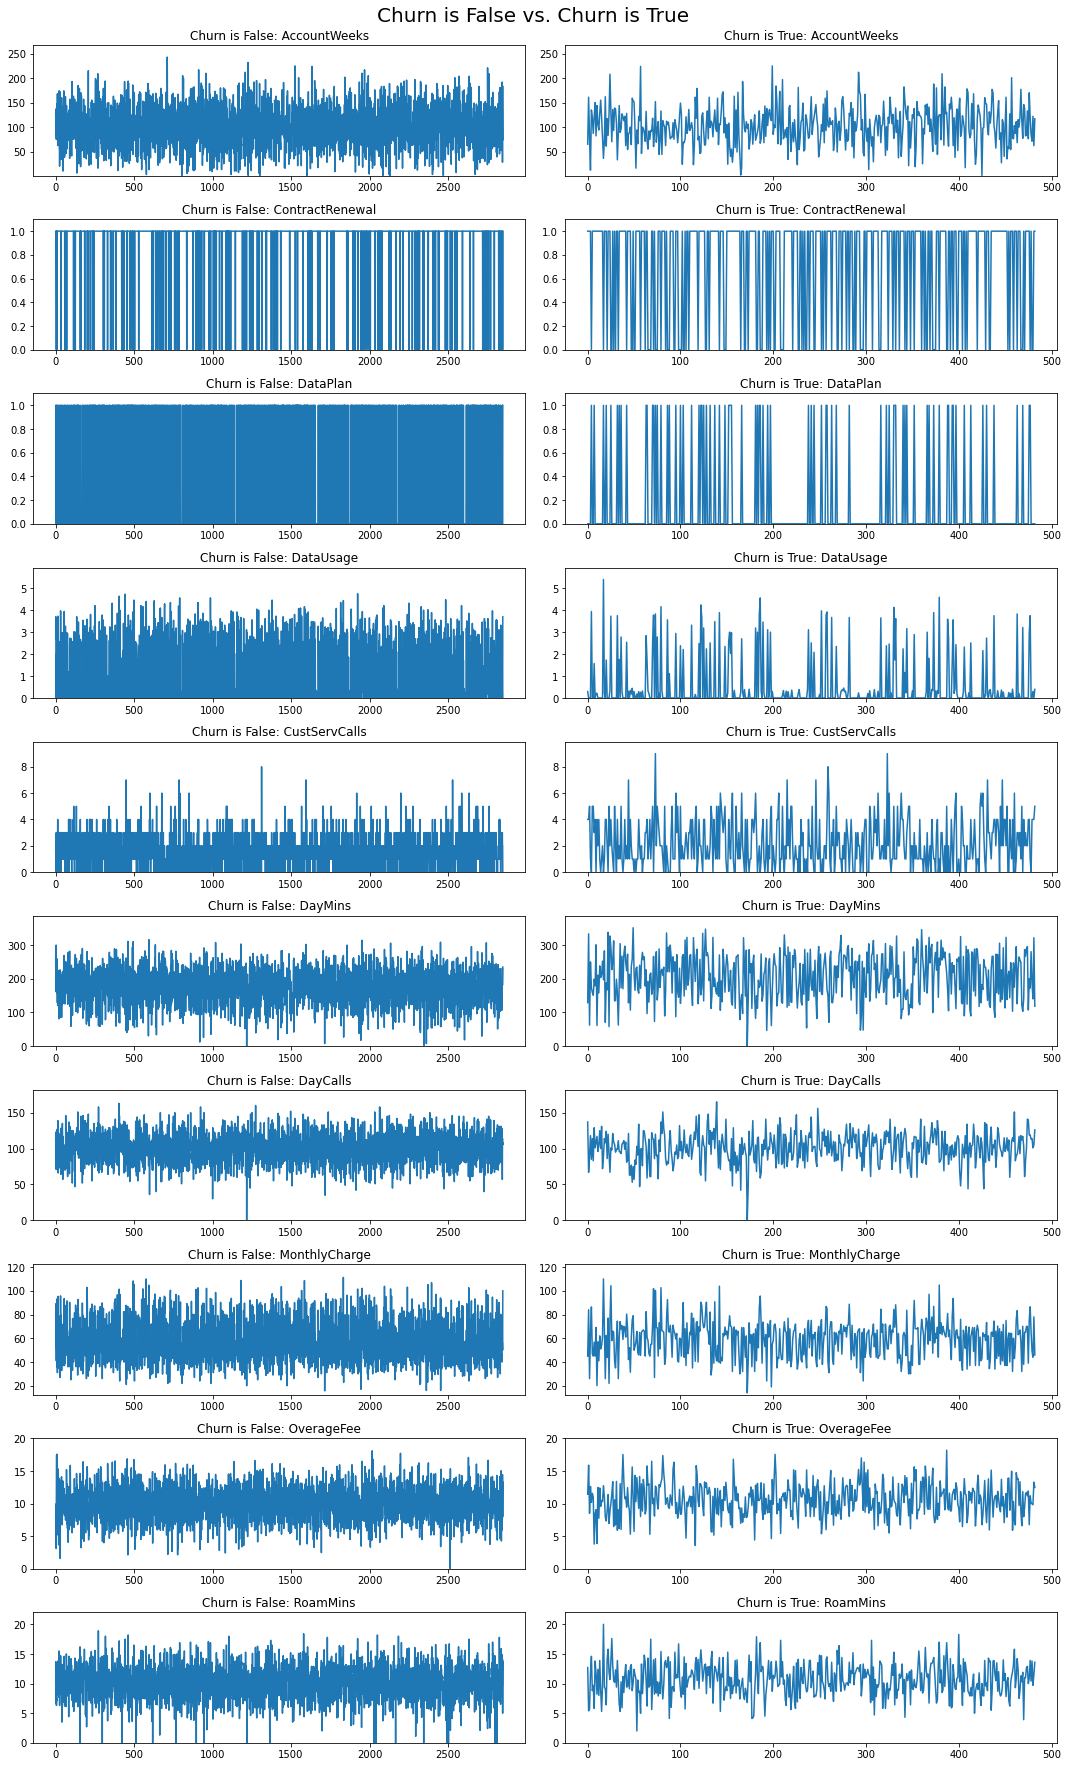

In [17]:
# Compare Churn is 'False' vs. 'True'

rows = 10
columns = 2
names = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
         'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']


fig, ax = plt.subplots(10, 2, figsize=(15, 25))

# plot acceleration while Churn is False
for r in range(rows):
    df_churn_is_false = df[df['Churn'] == False].reset_index(drop=True)
    ax[r, 0].plot(df_churn_is_false[names[r]])
    ax[r, 0].set_title(f'Churn is False: {names[r]}')
    # Match the Y-axis display range between True and False.
    ymin, ymax = min(df[names[r]]), max(df[names[r]])
    ax[r, 0].set_ylim(ymin-0.1*abs(ymin), ymax+0.1*ymax)
    
# plot acceleration while Churn is True
for r in range(rows):
    df_churn_is_true = df[df['Churn'] == True].reset_index(drop=True)
    ax[r, 1].plot(df_churn_is_true[names[r]])
    ax[r, 1].set_title(f'Churn is True: {names[r]}')
    # Match the Y-axis display range between True and False.
    ymin, ymax = min(df[names[r]]), max(df[names[r]])
    ax[r, 1].set_ylim(ymin-0.1*abs(ymin), ymax+0.1*ymax)
    
fig.suptitle(f'Churn is False vs. Churn is True', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

Text(0, 0.5, 'Count')

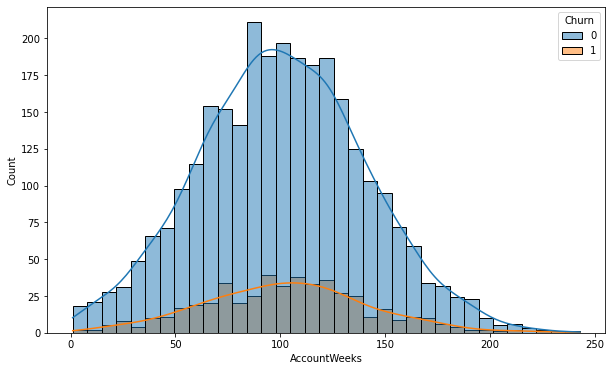

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "AccountWeeks", kde = True, hue = "Churn")
plt.xlabel('AccountWeeks')
plt.ylabel('Count')

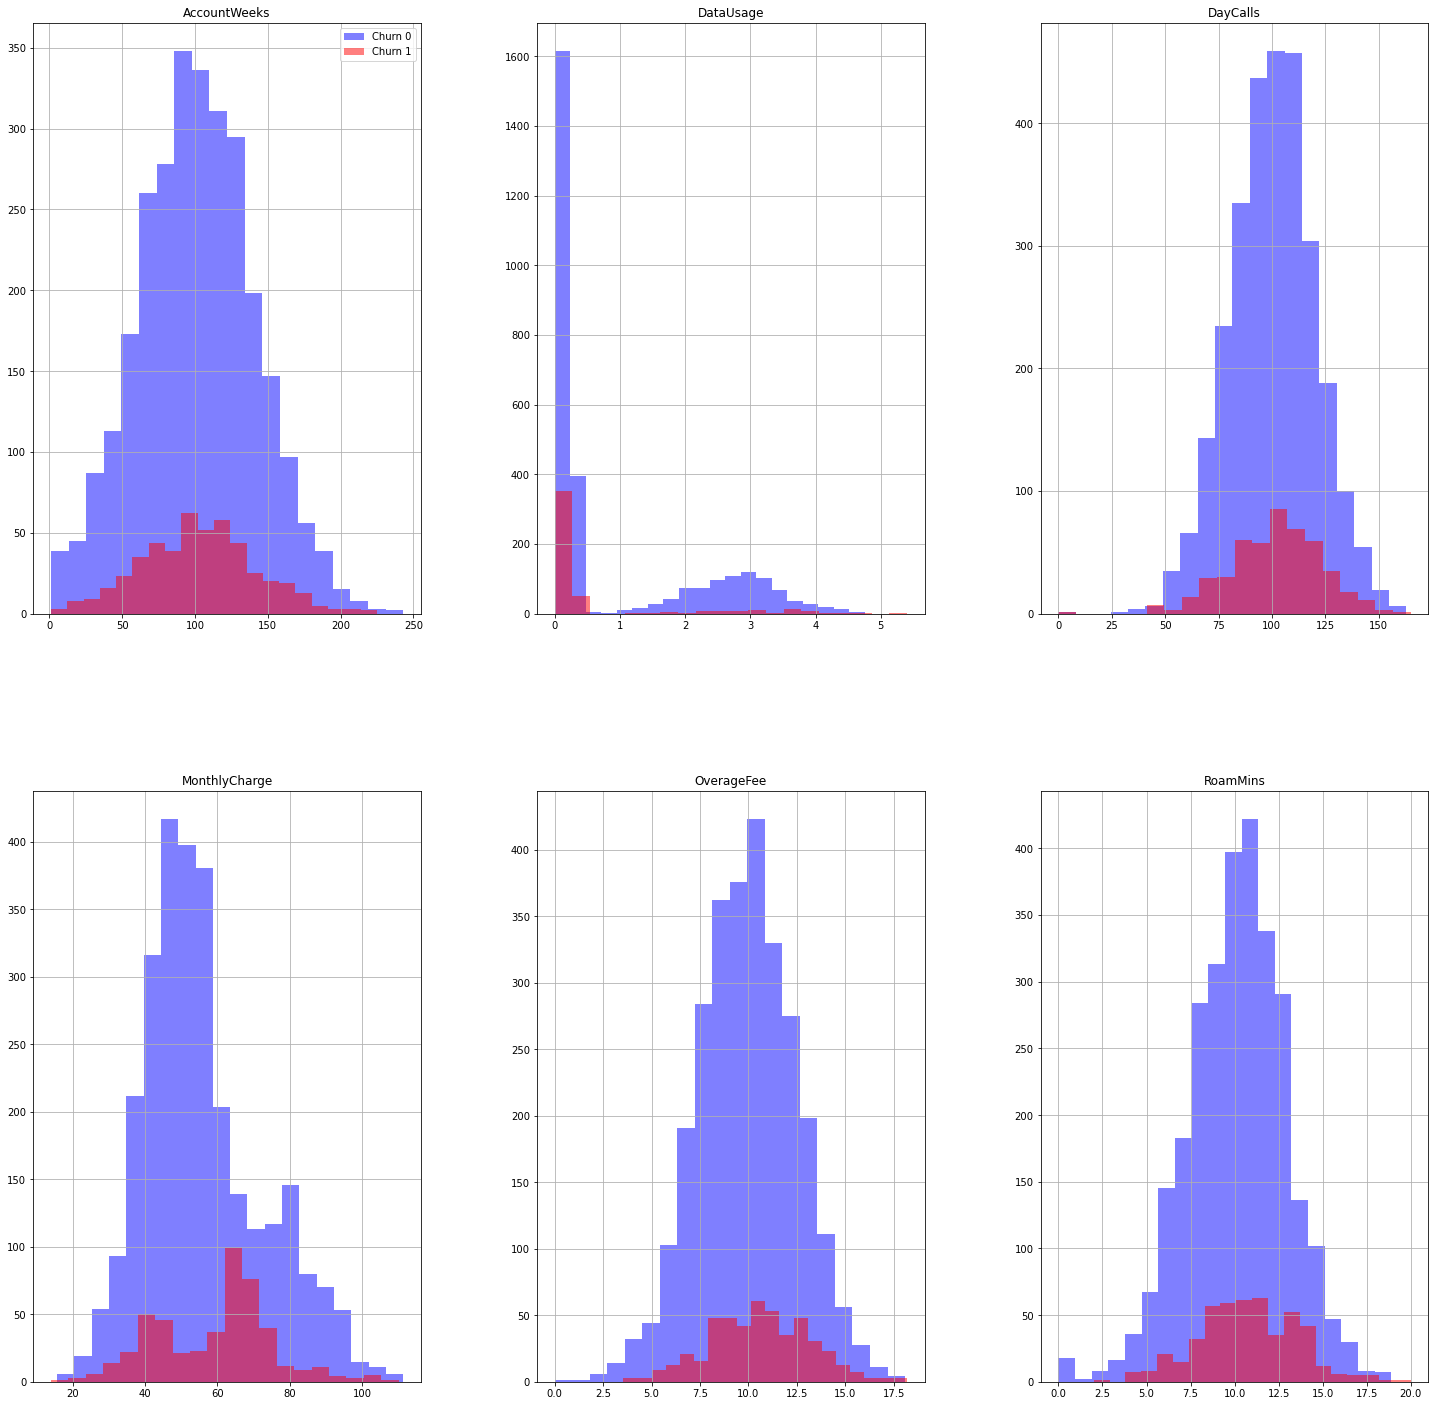

In [19]:
from matplotlib import pyplot as plt
import numpy as np

# Creating bin in chart
numerical_features = ['AccountWeeks', 'DataUsage', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
fig, ax = plt.subplots(2, 3, figsize=(25, 25))

# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax, label='Churn 0')
df[df.Churn == 1][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax, label='Churn 1')

# Add a legend to the plot
ax[0, 0].legend()

plt.show()

# Splitting features and target variable

In [20]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [21]:
X = df.drop(columns=['Churn'])

In [22]:
y = df['Churn']

# Split into train test set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#split imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#scale imbalanced data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

**Logistic Regression**

In [27]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [28]:
print("\nConfusion Matrix for Logistic Regression Model with dataset:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model with dataset:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model with dataset:

 [[555  11]
 [ 83  18]]

Classification Report for Logistic Regression Model with dataset:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



**Random Forest**

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [30]:
print("\nConfusion Matrix for Random Forest Model with dataset:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model with dataset:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model with dataset:

 [[556  10]
 [ 39  62]]

Classification Report for Random Forest Model with dataset:

               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667



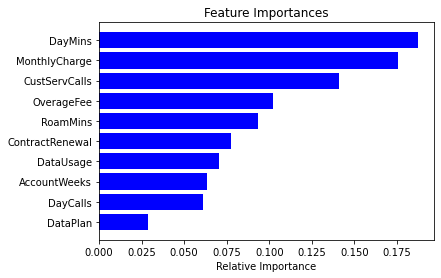

In [31]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Support Vector Machine**

In [32]:
clf=svm.SVC(kernel='rbf',C=10,gamma=0.01)

In [33]:
clf.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [34]:
svm_hat=clf.predict(X_test)

In [35]:
print("\nConfusion Matrix for SVM Model with dataset:\n\n",confusion_matrix(y_test.values,svm_hat))
print("\nClassification Report for SVM Model with dataset:\n\n",classification_report(y_test.values,svm_hat))


Confusion Matrix for SVM Model with dataset:

 [[541  25]
 [ 79  22]]

Classification Report for SVM Model with dataset:

               precision    recall  f1-score   support

           0       0.87      0.96      0.91       566
           1       0.47      0.22      0.30       101

    accuracy                           0.84       667
   macro avg       0.67      0.59      0.60       667
weighted avg       0.81      0.84      0.82       667



Metric 1: ROC-AUC-Score

In [36]:
AUC_ib_svm=roc_auc_score(y_test.values,svm_hat)
AUC_ib_svm

0.5868260854353987

Metric 2: Log Loss

In [37]:
ll_ib_svm=log_loss(y_test.values,svm_hat)
ll_ib_svm

5.385386409305046

**Decision Tree**

In [38]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=0)

In [39]:
pd_hat = clfd.predict(X_test)

In [40]:
print("\nConfusion Matrix for Decision Tree Model with dataset:\n\n",confusion_matrix(y_test.values,pd_hat))
print("\nClassification Report for Decision Tree Model with dataset:\n\n",classification_report(y_test.values,pd_hat))


Confusion Matrix for Decision Tree Model with dataset:

 [[560   6]
 [ 56  45]]

Classification Report for Decision Tree Model with dataset:

               precision    recall  f1-score   support

           0       0.91      0.99      0.95       566
           1       0.88      0.45      0.59       101

    accuracy                           0.91       667
   macro avg       0.90      0.72      0.77       667
weighted avg       0.91      0.91      0.89       667



Metric 1: ROC-AUC-Score

In [41]:
AUC_ib_pd=roc_auc_score(y_test.values,pd_hat)
AUC_ib_pd

0.7174719238708324

Metric 2: Log Loss

In [42]:
ll_ib_pd=log_loss(y_test.values,pd_hat)
ll_ib_pd

3.2105081470300516

**Cross Validation**

In [43]:
accuracy_lr=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10)
score_lr=accuracy_score(y_test,y_pred_lr)
dif_lr=(accuracy_lr.mean()-score_lr)/score_lr

In [44]:
print("The logistic regression model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_lr.mean()))
print("The evaluation accuracy score for logistic model is {}".format(score_lr))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_lr))

The logistic regression model's mean accuracy score after cross validation on training dataset is 0.8559544929740082
The evaluation accuracy score for logistic model is 0.8590704647676162
The percentage difference between cross validation and evaluation is -0.0036271434316519045, meaning our model is not overfitting or underfitting


In [45]:
accuracy_rf=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=10)
score_rf=accuracy_score(y_test,y_pred_rf)
dif_rf=(accuracy_rf.mean()-score_rf)/score_rf

In [46]:
print("The random forest model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_rf.mean()))
print("The evaluation accuracy score for random forest is {}".format(score_rf))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_rf))

The random forest model's mean accuracy score after cross validation on training dataset is 0.9396102616090788
The evaluation accuracy score for random forest is 0.9265367316341829
The percentage difference between cross validation and evaluation is 0.014110104358018669, meaning our model is not overfitting or underfitting


In [47]:
accuracy_svm=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10)
score_svm=accuracy_score(y_test,svm_hat)
dif_svm=(accuracy_svm.mean()-score_svm)/score_svm

In [48]:
print("The svm model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_svm.mean()))
print("The evaluation accuracy score for svm is {}".format(score_svm))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_svm))

The svm model's mean accuracy score after cross validation on training dataset is 0.843213370504914
The evaluation accuracy score for svm is 0.8440779610194903
The percentage difference between cross validation and evaluation is -0.0010243017286366046, meaning our model is not overfitting or underfitting


In [49]:
accuracy_pd=cross_val_score(clfd,X_train,y_train,scoring='accuracy',cv=10)
score_pd=accuracy_score(y_test,pd_hat)
dif_pd=(accuracy_pd.mean()-score_pd)/score_pd

In [50]:
print("The Decision Tree model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_pd.mean()))
print("The evaluation accuracy score for Decision Tree is {}".format(score_pd))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_pd))

The Decision Tree model's mean accuracy score after cross validation on training dataset is 0.9234899045366225
The evaluation accuracy score for Decision Tree is 0.9070464767616192
The percentage difference between cross validation and evaluation is 0.018128539381697846, meaning our model is not overfitting or underfitting


**Note: Cross validation on svm model takes longer than other models. Therefore, the train and test sets are split to enhance the processing time while attempting to maintain an unbiased estimate**

In [51]:
print("Accuracy of logistic regression with Cross Validation is:",accuracy_lr.mean() * 100)
print("Accuracy of random forest with Cross Validation is:",accuracy_rf.mean() * 100)
print("Accuracy of svm with Cross Validation is:",accuracy_svm.mean() * 100)
print("Accuracy of Decision Tree with Cross Validation is:",accuracy_pd.mean() * 100)

Accuracy of logistic regression with Cross Validation is: 85.59544929740082
Accuracy of random forest with Cross Validation is: 93.96102616090788
Accuracy of svm with Cross Validation is: 84.3213370504914
Accuracy of Decision Tree with Cross Validation is: 92.34899045366225


**Selection the Best model and Explain it using success metrics**

AUC for logstic regression

In [52]:
AUC_ib_lr=roc_auc_score(y_test.values, y_pred_lr)
print("The auc for imbalanced dataset on Logstic Regression is {}".format(AUC_ib_lr))

The auc for imbalanced dataset on Logstic Regression is 0.5793915964034565


Log Loss for logistic regression

In [53]:
ll_ib_lr=log_loss(y_test.values, y_pred_lr)
print("The log_loss for imbalanced dataset on Logstic Regression is {}".format(ll_ib_lr))

The log_loss for imbalanced dataset on Logstic Regression is 4.867546891594207


AUC for random forest

In [54]:
AUC_ib_rf=roc_auc_score(y_test.values, y_pred_rf)
print("The auc for imbalanced dataset on Random Forest is {}".format(AUC_ib_lr))

The auc for imbalanced dataset on Random Forest is 0.5793915964034565


Log Loss for random forest

In [55]:
ll_ib_rf=log_loss(y_test.values, y_pred_rf)
print("The log_loss for imbalanced dataset on Logstic Regression is {}".format(ll_ib_rf))

The log_loss for imbalanced dataset on Logstic Regression is 2.537343387293742


AUC for Decision Tree

In [56]:
AUC_ib_pd=roc_auc_score(y_test.values, pd_hat)
print("The auc for imbalanced dataset on Random Forest is {}".format(AUC_ib_pd))

The auc for imbalanced dataset on Random Forest is 0.7174719238708324


Log Loss for Decision Tree

In [57]:
AUC_ib_pd=roc_auc_score(y_test.values, pd_hat)
print("The auc for imbalanced dataset on Random Forest is {}".format(AUC_ib_pd))

The auc for imbalanced dataset on Random Forest is 0.7174719238708324


# Visualization of the metrics

In [58]:
precision_lr,recall_lr,fscore_lr,support_lr=score(y_test,y_pred_lr)
precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,y_pred_rf)
precision_svm,recall_svm,fscore_svm,support_svm=score(y_test,svm_hat)
precision_pd,recall_pd,fscore_pd,support_pd=score(y_test,pd_hat)

In [59]:
prec=[precision_lr.mean(),precision_rf.mean(),precision_svm.mean(),precision_pd.mean()]
rec=[recall_lr.mean(),recall_rf.mean(),recall_svm.mean(),recall_pd.mean()]
fsco=[fscore_lr.mean(),fscore_rf.mean(),fscore_svm.mean(),fscore_pd.mean()]
accu=[accuracy_lr.mean(),accuracy_rf.mean(),accuracy_svm.mean(),accuracy_pd.mean()]
auc=[AUC_ib_lr,AUC_ib_rf,AUC_ib_svm,AUC_ib_pd]
log_loss=[ll_ib_lr,ll_ib_rf,ll_ib_svm,ll_ib_pd]

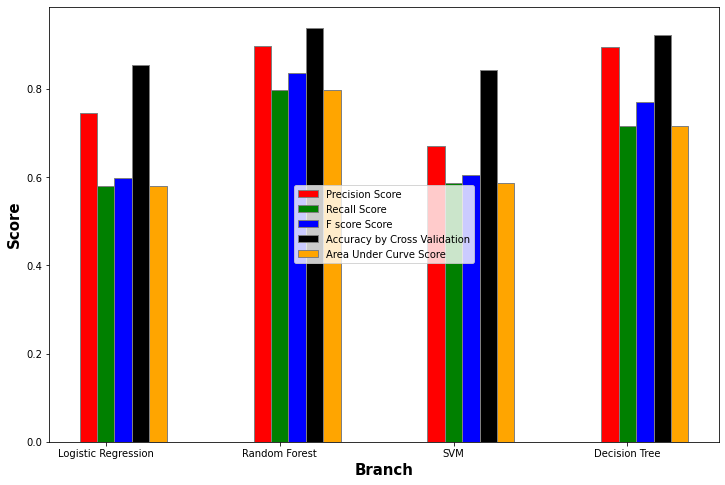

In [60]:
barWidth=0.1
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(prec))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br5=[x+barWidth for x in br4]
#br6=[x+barWidth for x in br5]
plt.bar(br1,prec, color='r',width=barWidth,edgecolor='grey',label='Precision Score')
plt.bar(br2,rec,color='g',width=barWidth,edgecolor='grey',label='Recall Score')
plt.bar(br3,fsco, color='b',width=barWidth,edgecolor='grey',label='F score Score')
plt.bar(br4,accu, color='black',width=barWidth,edgecolor='grey',label='Accuracy by Cross Validation')
plt.bar(br5,auc,color='orange',width=barWidth,edgecolor='grey',label='Area Under Curve Score')
#plt.bar(br6,log_loss,color='pink',width=barWidth,edgecolor='grey',label='Log Loss Score')
plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Score',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','SVM','Decision Tree'])

plt.legend(fontsize=10,loc='center')
plt.show()

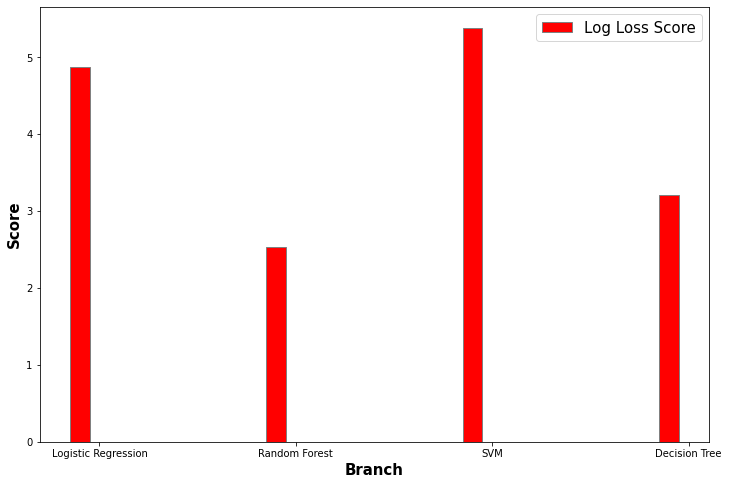

In [61]:
barWidth_1=0.1
fig=plt.subplots(figsize=(12,8))
br6=np.arange(len(log_loss))

plt.bar(br6,log_loss, color='r',width=barWidth,edgecolor='grey',label='Log Loss Score')

plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Score',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','SVM','Decision Tree'])

plt.legend(fontsize=15,loc='upper right')
plt.show()

# Now try it with Balanced Data

Split into train test set

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X, y=sm.fit_resample(X,y)

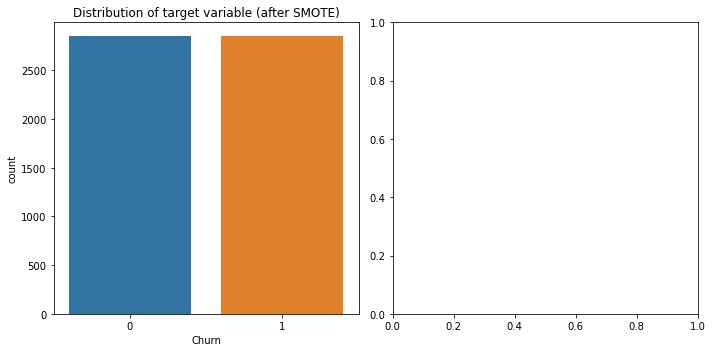

In [64]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
# Plot the distribution of the original data
sns.countplot(x=y, ax=axs[0])
axs[0].set_title('Distribution of target variable (after SMOTE)')
# Show the plot
plt.tight_layout()
plt.show()

In [65]:
#split imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Standardization**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
#scale imbalanced data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modeling Balance**

Logistic Regression

In [68]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [69]:
print("\nConfusion Matrix for Logistic Regression Model with dataset:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model with dataset:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model with dataset:

 [[468 117]
 [111 444]]

Classification Report for Logistic Regression Model with dataset:

               precision    recall  f1-score   support

           0       0.81      0.80      0.80       585
           1       0.79      0.80      0.80       555

    accuracy                           0.80      1140
   macro avg       0.80      0.80      0.80      1140
weighted avg       0.80      0.80      0.80      1140



Random Forest

In [70]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [71]:
print("\nConfusion Matrix for Random Forest Model with dataset:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model with dataset:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model with dataset:

 [[535  50]
 [ 28 527]]

Classification Report for Random Forest Model with dataset:

               precision    recall  f1-score   support

           0       0.95      0.91      0.93       585
           1       0.91      0.95      0.93       555

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



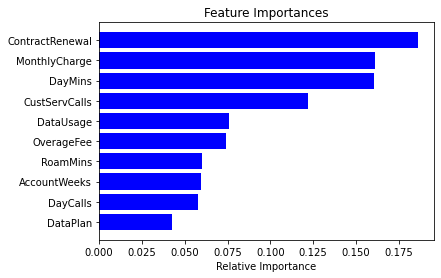

In [72]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Support Vector Machine

In [73]:
clf=svm.SVC(kernel='rbf',C=10,gamma=0.01)

In [74]:
clf.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [75]:
svm_hat=clf.predict(X_test)

In [76]:
print("\nConfusion Matrix for SVM Model with dataset:\n\n",confusion_matrix(y_test.values,svm_hat))
print("\nClassification Report for SVM Model with dataset:\n\n",classification_report(y_test.values,svm_hat))


Confusion Matrix for SVM Model with dataset:

 [[529  56]
 [ 25 530]]

Classification Report for SVM Model with dataset:

               precision    recall  f1-score   support

           0       0.95      0.90      0.93       585
           1       0.90      0.95      0.93       555

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



Decision Tree

In [77]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=0)

In [78]:
pd_hat = clfd.predict(X_test)

In [79]:
print("\nConfusion Matrix for Decision Tree Model with dataset:\n\n",confusion_matrix(y_test.values,pd_hat))
print("\nClassification Report for Decision Tree Model with dataset:\n\n",classification_report(y_test.values,pd_hat))


Confusion Matrix for Decision Tree Model with dataset:

 [[538  47]
 [ 84 471]]

Classification Report for Decision Tree Model with dataset:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89       585
           1       0.91      0.85      0.88       555

    accuracy                           0.89      1140
   macro avg       0.89      0.88      0.88      1140
weighted avg       0.89      0.89      0.88      1140



**Cross Validation**

In [80]:
accuracy_lr=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10)
score_lr=accuracy_score(y_test,y_pred_lr)
dif_lr=(accuracy_lr.mean()-score_lr)/score_lr

In [81]:
print("The logistic regression model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_lr.mean()))
print("The evaluation accuracy score for logistic model is {}".format(score_lr))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_lr))

The logistic regression model's mean accuracy score after cross validation on training dataset is 0.7789473684210526
The evaluation accuracy score for logistic model is 0.8
The percentage difference between cross validation and evaluation is -0.026315789473684292, meaning our model is not overfitting or underfitting


In [82]:
accuracy_rf=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=10)
score_rf=accuracy_score(y_test,y_pred_rf)
dif_rf=(accuracy_rf.mean()-score_rf)/score_rf

In [83]:
print("The random forest model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_rf.mean()))
print("The evaluation accuracy score for random forest is {}".format(score_rf))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_rf))

The random forest model's mean accuracy score after cross validation on training dataset is 0.924780701754386
The evaluation accuracy score for random forest is 0.9315789473684211
The percentage difference between cross validation and evaluation is -0.007297551789077206, meaning our model is not overfitting or underfitting


In [84]:
accuracy_svm=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10)
score_svm=accuracy_score(y_test,svm_hat)
dif_svm=(accuracy_svm.mean()-score_svm)/score_svm

In [85]:
print("The svm model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_svm.mean()))
print("The evaluation accuracy score for svm is {}".format(score_svm))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_svm))

The svm model's mean accuracy score after cross validation on training dataset is 0.9114035087719298
The evaluation accuracy score for svm is 0.9289473684210526
The percentage difference between cross validation and evaluation is -0.018885741265344723, meaning our model is not overfitting or underfitting


In [86]:
accuracy_pd=cross_val_score(clfd,X_train,y_train,scoring='accuracy',cv=10)
score_pd=accuracy_score(y_test,pd_hat)
dif_pd=(accuracy_pd.mean()-score_pd)/score_pd

In [87]:
print("The Decision Tree model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_pd.mean()))
print("The evaluation accuracy score for Decision Tree is {}".format(score_pd))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_pd))

The Decision Tree model's mean accuracy score after cross validation on training dataset is 0.85
The evaluation accuracy score for Decision Tree is 0.8850877192982456
The percentage difference between cross validation and evaluation is -0.03964321110009911, meaning our model is not overfitting or underfitting


In [88]:
print("Accuracy of logistic regression with Cross Validation is:",accuracy_lr.mean() * 100)
print("Accuracy of random forest with Cross Validation is:",accuracy_rf.mean() * 100)
print("Accuracy of svm with Cross Validation is:",accuracy_svm.mean() * 100)
print("Accuracy of Decision Tree with Cross Validation is:",accuracy_pd.mean() * 100)

Accuracy of logistic regression with Cross Validation is: 77.89473684210526
Accuracy of random forest with Cross Validation is: 92.4780701754386
Accuracy of svm with Cross Validation is: 91.14035087719297
Accuracy of Decision Tree with Cross Validation is: 85.0


AUC for logstic regression

In [94]:
from sklearn.metrics import log_loss

In [95]:
AUC_ib_lr=roc_auc_score(y_test.values, y_pred_lr)
print("The auc for imbalanced dataset on Logstic Regression is {}".format(AUC_ib_lr))

The auc for imbalanced dataset on Logstic Regression is 0.8


Log Loss for logistic regression

In [96]:
ll_ib_lr=log_loss(y_test.values, y_pred_lr)
print("The log_loss for imbalanced dataset on Logstic Regression is {}".format(ll_ib_lr))

The log_loss for imbalanced dataset on Logstic Regression is 6.907837342928921


AUC for random forest

In [97]:
AUC_ib_rf=roc_auc_score(y_test.values, y_pred_rf)
print("The auc for imbalanced dataset on Random Forest is {}".format(AUC_ib_lr))

The auc for imbalanced dataset on Random Forest is 0.8


Log Loss for random forest

In [98]:
ll_ib_rf=log_loss(y_test.values, y_pred_rf)
print("The log_loss for imbalanced dataset on Logstic Regression is {}".format(ll_ib_rf))

The log_loss for imbalanced dataset on Logstic Regression is 2.363214507609249


AUC for Decision Tree

In [99]:
AUC_ib_pd=roc_auc_score(y_test.values, pd_hat)
print("The auc for imbalanced dataset on Random Forest is {}".format(AUC_ib_pd))

The auc for imbalanced dataset on Random Forest is 0.8841533841533842


Log Loss for Decision Tree

In [100]:
ll_ib_pd=log_loss(y_test.values, pd_hat)
print("The auc for imbalanced dataset on Random Forest is {}".format(ll_ib_pd))

The auc for imbalanced dataset on Random Forest is 3.9689625340460695


# Visualization of the metrics

In [101]:
precision_lr,recall_lr,fscore_lr,support_lr=score(y_test,y_pred_lr)
precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,y_pred_rf)
precision_svm,recall_svm,fscore_svm,support_svm=score(y_test,svm_hat)
precision_pd,recall_pd,fscore_pd,support_pd=score(y_test,pd_hat)

In [102]:
prec=[precision_lr.mean(),precision_rf.mean(),precision_svm.mean(),precision_pd.mean()]
rec=[recall_lr.mean(),recall_rf.mean(),recall_svm.mean(),recall_pd.mean()]
fsco=[fscore_lr.mean(),fscore_rf.mean(),fscore_svm.mean(),fscore_pd.mean()]
accu=[accuracy_lr.mean(),accuracy_rf.mean(),accuracy_svm.mean(),accuracy_pd.mean()]
auc=[AUC_ib_lr,AUC_ib_rf,AUC_ib_svm,AUC_ib_pd]
log_loss=[ll_ib_lr,ll_ib_rf,ll_ib_svm,ll_ib_pd]

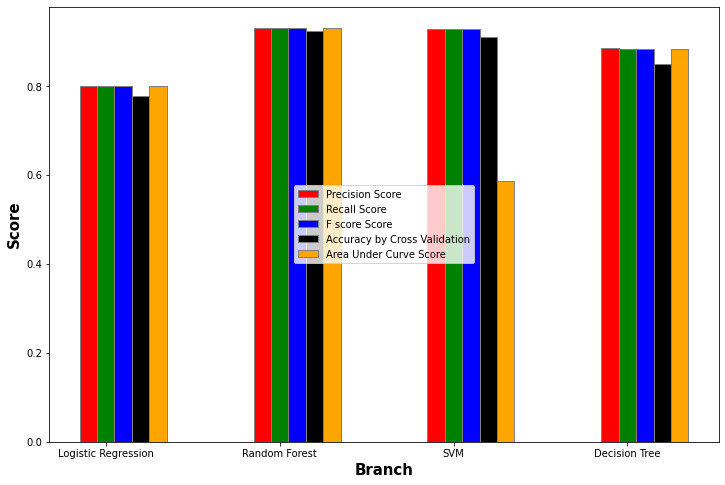

In [103]:
barWidth=0.1
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(prec))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br5=[x+barWidth for x in br4]
#br6=[x+barWidth for x in br5]
plt.bar(br1,prec, color='r',width=barWidth,edgecolor='grey',label='Precision Score')
plt.bar(br2,rec,color='g',width=barWidth,edgecolor='grey',label='Recall Score')
plt.bar(br3,fsco, color='b',width=barWidth,edgecolor='grey',label='F score Score')
plt.bar(br4,accu, color='black',width=barWidth,edgecolor='grey',label='Accuracy by Cross Validation')
plt.bar(br5,auc,color='orange',width=barWidth,edgecolor='grey',label='Area Under Curve Score')
#plt.bar(br6,log_loss,color='pink',width=barWidth,edgecolor='grey',label='Log Loss Score')
plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Score',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','SVM','Decision Tree'])

plt.legend(fontsize=10,loc='center')
plt.show()

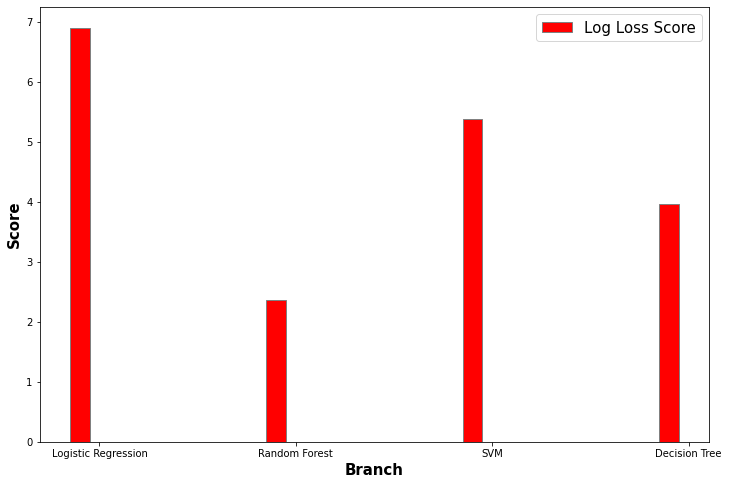

In [104]:
barWidth_1=0.1
fig=plt.subplots(figsize=(12,8))
br6=np.arange(len(log_loss))

plt.bar(br6,log_loss, color='r',width=barWidth,edgecolor='grey',label='Log Loss Score')

plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Score',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','SVM','Decision Tree'])

plt.legend(fontsize=15,loc='upper right')
plt.show()

# Balance Dataset & Clustering

**Clustering**

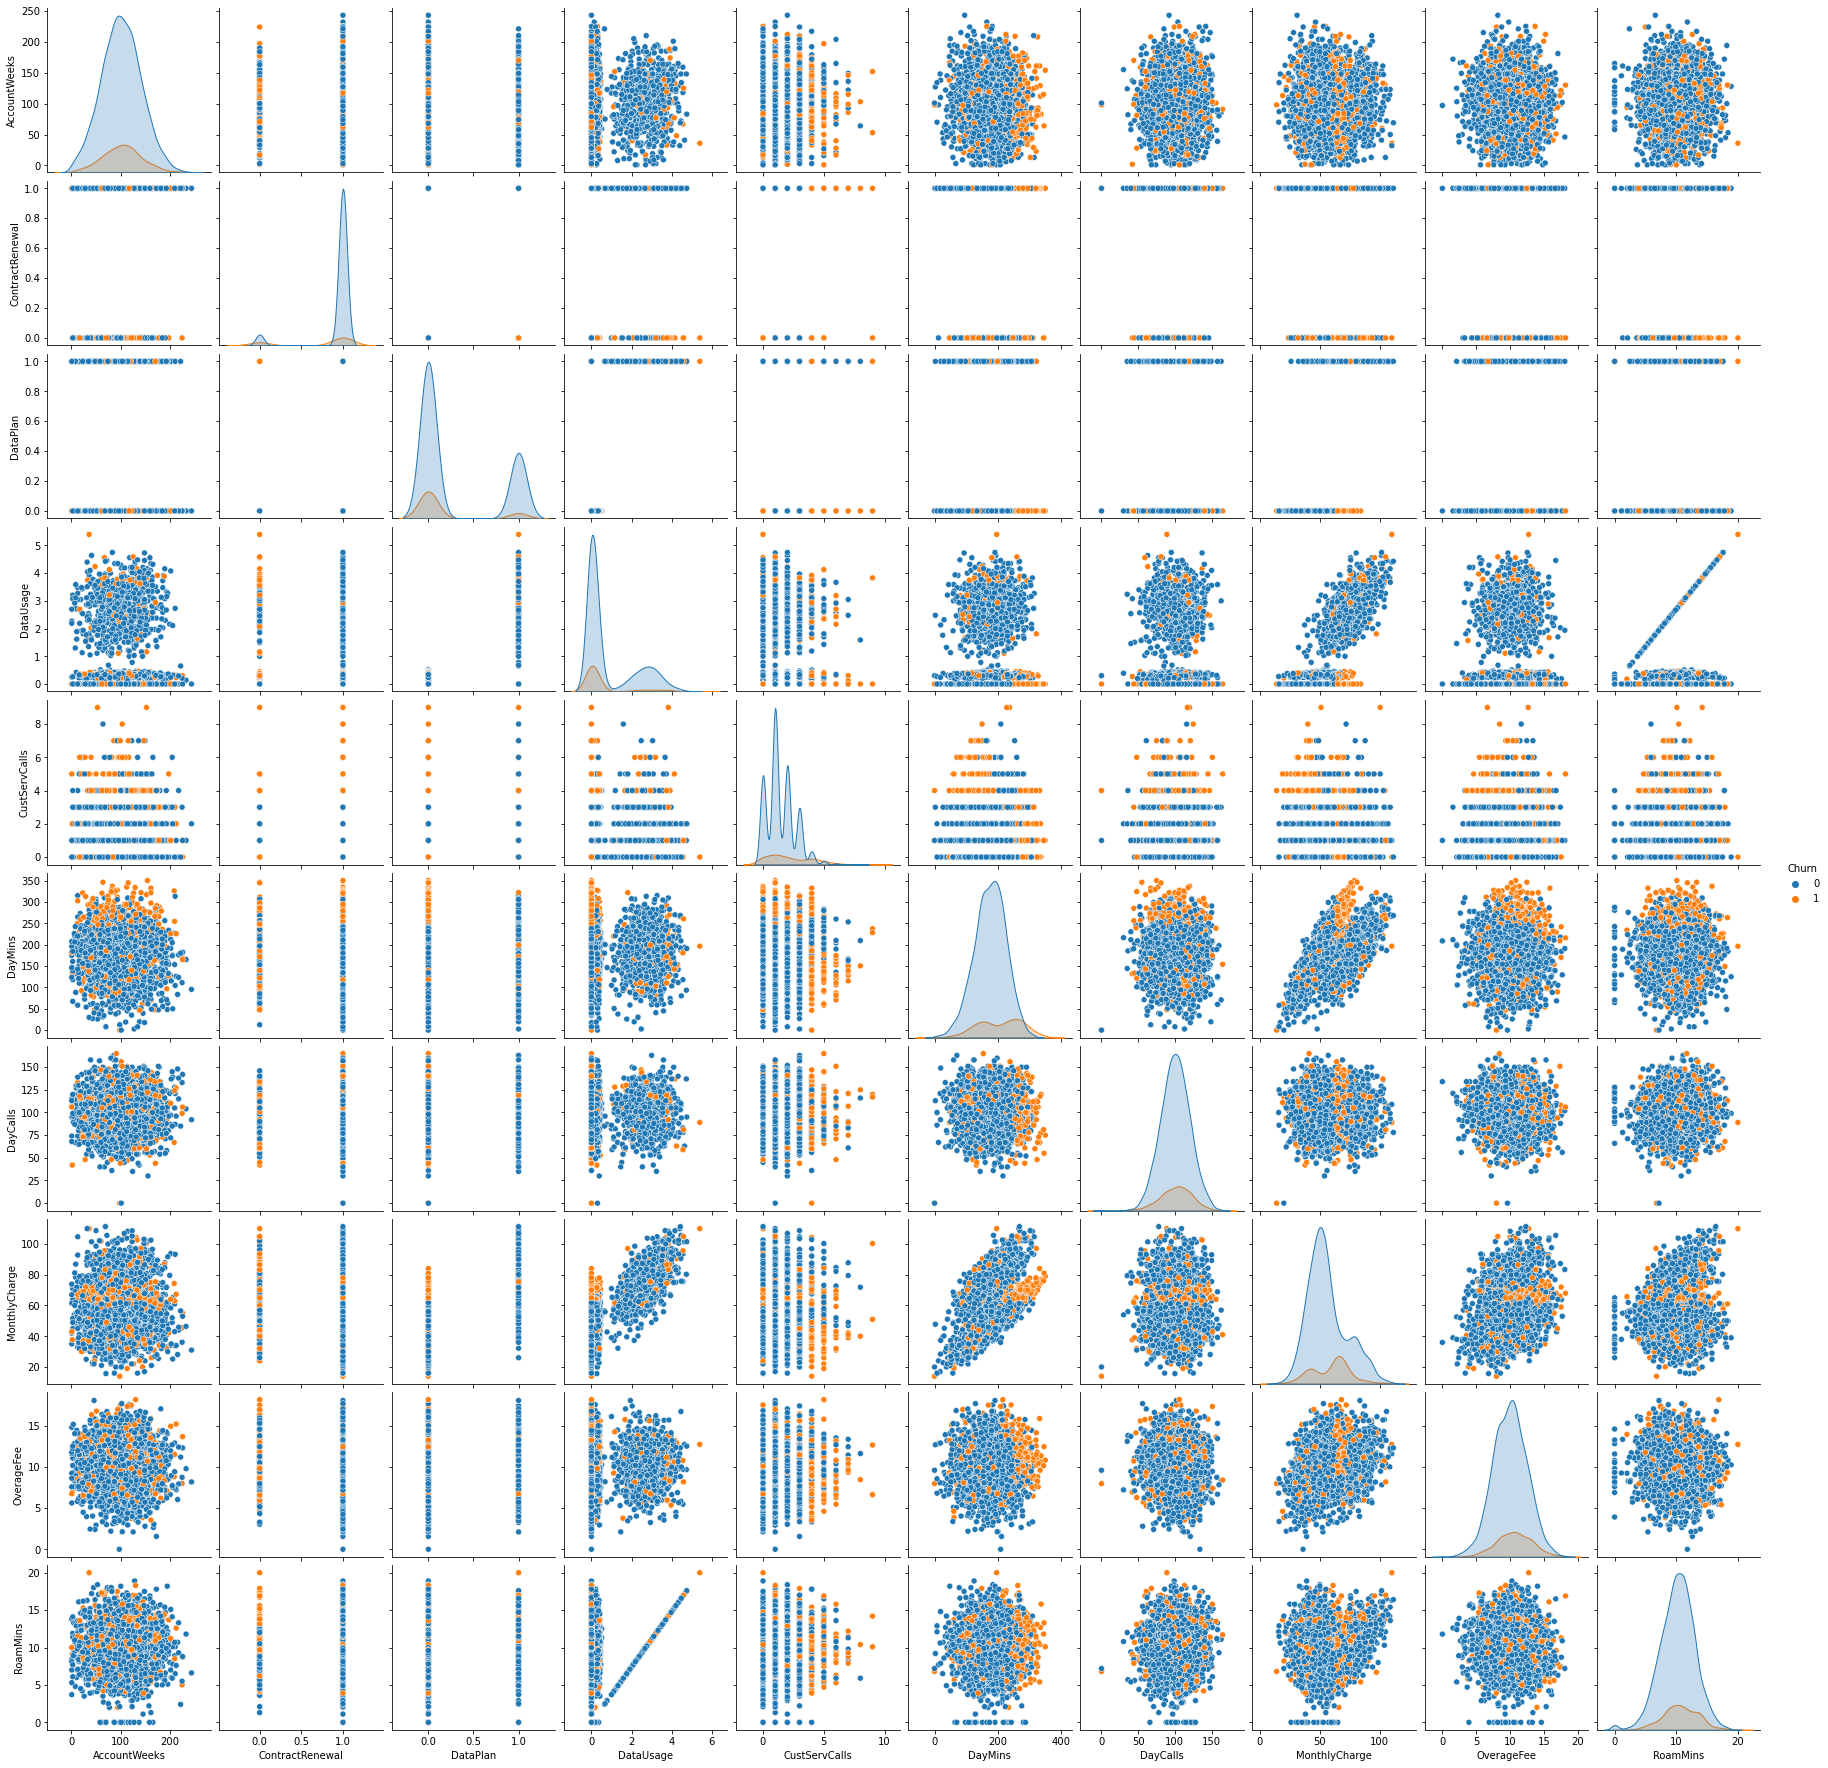

In [105]:
import seaborn as sns

# Pairplot of all features, colored by "Churn"
sns.pairplot(df, hue="Churn")
plt.show()

In [106]:
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

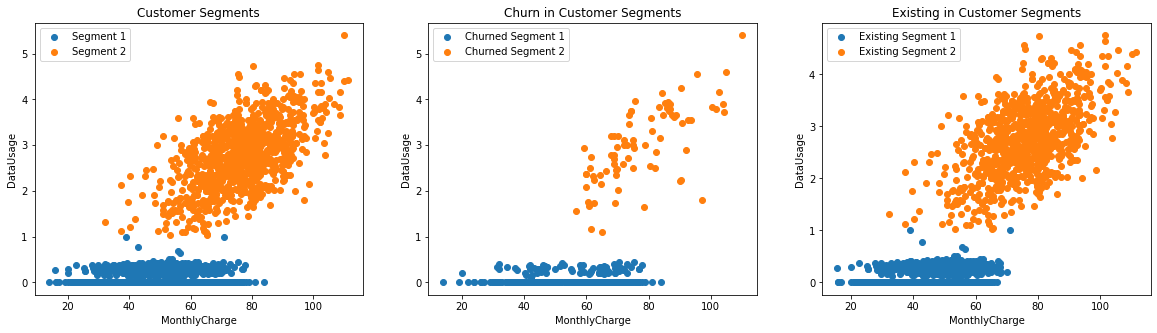

In [107]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

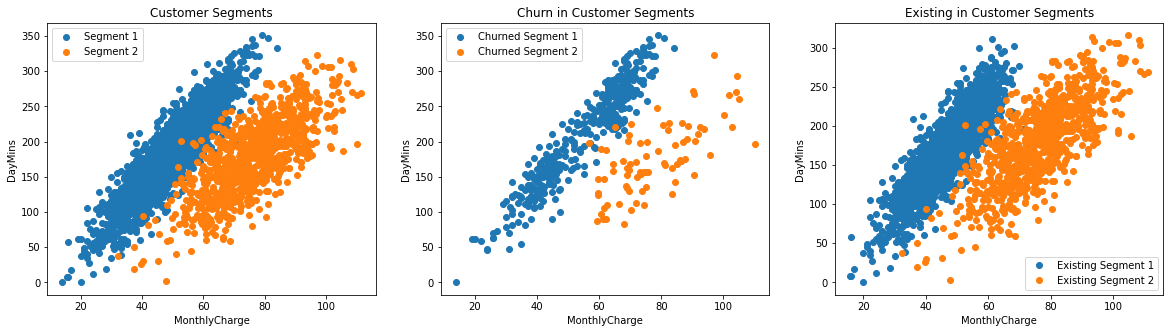

In [108]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def prepare_data(segment_churn, segment_existing):
    # Concatenate the two segments
    segment = pd.concat([segment_churn, segment_existing])
    
    # Separate the features and target variable
    X = segment.drop('Churn', axis=1)
    y = segment['Churn']
    
    # Save feature names
    features = X.columns

    # Split into temporary training and testing sets
    X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_temp_train_scaled = scaler.fit_transform(X_temp_train)
    X_temp_test_scaled = scaler.transform(X_temp_test)
    
    # Apply SMOTE on the standardized features
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_temp_train_scaled, y_temp_train)
    
    # Split into final training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, features

# Prepare data for both segments
X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, features_seg1 = prepare_data(seg11, seg10)
X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, features_seg2 = prepare_data(seg21, seg20)

# Modeling

**Logistic Regression**

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Function to fit and evaluate a logistic regression model
def train_and_evaluate(X_train, X_test, y_train, y_test, segment_name):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    print(f"\nConfusion Matrix for Logistic Regression Model with {segment_name}:\n\n", confusion_matrix(y_test, y_pred_lr))
    print(f"\nClassification Report for Logistic Regression Model with {segment_name}:\n\n", classification_report(y_test, y_pred_lr))

# Train and evaluate models for both segments
train_and_evaluate(X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, 'Segment 1')
train_and_evaluate(X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, 'Segment 2')


Confusion Matrix for Logistic Regression Model with Segment 1:

 [[244  71]
 [ 86 245]]

Classification Report for Logistic Regression Model with Segment 1:

               precision    recall  f1-score   support

           0       0.74      0.77      0.76       315
           1       0.78      0.74      0.76       331

    accuracy                           0.76       646
   macro avg       0.76      0.76      0.76       646
weighted avg       0.76      0.76      0.76       646


Confusion Matrix for Logistic Regression Model with Segment 2:

 [[108  24]
 [ 31 105]]

Classification Report for Logistic Regression Model with Segment 2:

               precision    recall  f1-score   support

           0       0.78      0.82      0.80       132
           1       0.81      0.77      0.79       136

    accuracy                           0.79       268
   macro avg       0.80      0.80      0.79       268
weighted avg       0.80      0.79      0.79       268



**Random Forest**


Confusion Matrix for Random Forest Model with Segment 1:

 [[296  19]
 [ 24 307]]

Classification Report for Random Forest Model with Segment 1:

               precision    recall  f1-score   support

           0       0.93      0.94      0.93       315
           1       0.94      0.93      0.93       331

    accuracy                           0.93       646
   macro avg       0.93      0.93      0.93       646
weighted avg       0.93      0.93      0.93       646



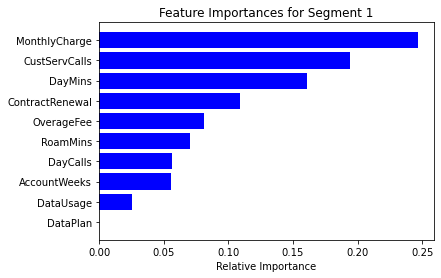


Confusion Matrix for Random Forest Model with Segment 2:

 [[128   4]
 [  5 131]]

Classification Report for Random Forest Model with Segment 2:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.97      0.96      0.97       136

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



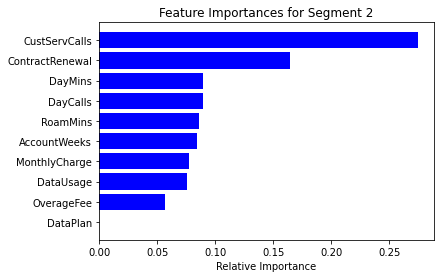

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_rf(X_train, X_test, y_train, y_test, segment_name, features):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"\nConfusion Matrix for Random Forest Model with {segment_name}:\n\n", confusion_matrix(y_test, y_pred_rf))
    print(f"\nClassification Report for Random Forest Model with {segment_name}:\n\n", classification_report(y_test, y_pred_rf))

    importances = rf.feature_importances_
    indices = np.argsort(importances)

    plt.title(f'Feature Importances for {segment_name}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Train and evaluate Random Forest models for both segments
train_and_evaluate_rf(X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, 'Segment 1', features_seg1)
train_and_evaluate_rf(X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, 'Segment 2', features_seg2)

**Support Vector Machine**

In [112]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_svm(X_train, X_test, y_train, y_test, segment_name):
    clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
    clf.fit(X_train, y_train)
    svm_hat = clf.predict(X_test)

    print(f"\nConfusion Matrix for SVM Model with {segment_name}:\n\n", confusion_matrix(y_test, svm_hat))
    print(f"\nClassification Report for SVM Model with {segment_name}:\n\n", classification_report(y_test, svm_hat))

# Train and evaluate SVM models for both segments
train_and_evaluate_svm(X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, 'Segment 1')
train_and_evaluate_svm(X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, 'Segment 2')


Confusion Matrix for SVM Model with Segment 1:

 [[279  36]
 [ 43 288]]

Classification Report for SVM Model with Segment 1:

               precision    recall  f1-score   support

           0       0.87      0.89      0.88       315
           1       0.89      0.87      0.88       331

    accuracy                           0.88       646
   macro avg       0.88      0.88      0.88       646
weighted avg       0.88      0.88      0.88       646


Confusion Matrix for SVM Model with Segment 2:

 [[114  18]
 [ 28 108]]

Classification Report for SVM Model with Segment 2:

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       132
           1       0.86      0.79      0.82       136

    accuracy                           0.83       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.83      0.83      0.83       268



**Decision Tree**

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test, segment_name):
    clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
    clfd.fit(X_train, y_train)
    pd_hat = clfd.predict(X_test)

    print(f"\nConfusion Matrix for Decision Tree Model with {segment_name}:\n\n", confusion_matrix(y_test, pd_hat))
    print(f"\nClassification Report for Decision Tree Model with {segment_name}:\n\n", classification_report(y_test, pd_hat))

# Train and evaluate Decision Tree models for both segments
train_and_evaluate_decision_tree(X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, 'Segment 1')
train_and_evaluate_decision_tree(X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, 'Segment 2')


Confusion Matrix for Decision Tree Model with Segment 1:

 [[272  43]
 [ 40 291]]

Classification Report for Decision Tree Model with Segment 1:

               precision    recall  f1-score   support

           0       0.87      0.86      0.87       315
           1       0.87      0.88      0.88       331

    accuracy                           0.87       646
   macro avg       0.87      0.87      0.87       646
weighted avg       0.87      0.87      0.87       646


Confusion Matrix for Decision Tree Model with Segment 2:

 [[123   9]
 [ 23 113]]

Classification Report for Decision Tree Model with Segment 2:

               precision    recall  f1-score   support

           0       0.84      0.93      0.88       132
           1       0.93      0.83      0.88       136

    accuracy                           0.88       268
   macro avg       0.88      0.88      0.88       268
weighted avg       0.88      0.88      0.88       268



**Cross Validation**

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

def train_and_predict(model, X_train, y_train, X_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    return trained_model, y_pred

def evaluate_with_cross_validation(model, X_train, X_test, y_train, y_test, y_pred, model_name, segment_name):
    # Cross-validation
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    cross_val_mean = cross_val_scores.mean()
    
    print(f"Model: {model_name}")
    print(f"Segment: {segment_name}")
    print(f"Cross-validation mean score: {cross_val_mean}")

In [123]:
# Train models and obtain predictions for Segment 1
lr_seg1, y_pred_lr_seg1 = train_and_predict(LogisticRegression(random_state=42), X_train_seg1, y_train_seg1, X_test_seg1)
rf_seg1, y_pred_rf_seg1 = train_and_predict(RandomForestClassifier(random_state=42), X_train_seg1, y_train_seg1, X_test_seg1)
clf_seg1, y_pred_svm_seg1 = train_and_predict(svm.SVC(kernel='rbf', C=10, gamma=0.01), X_train_seg1, y_train_seg1, X_test_seg1)
clfd_seg1, y_pred_pd_seg1 = train_and_predict(DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10), X_train_seg1, y_train_seg1, X_test_seg1)

# Train models and obtain predictions for Segment 2
lr_seg2, y_pred_lr_seg2 = train_and_predict(LogisticRegression(random_state=42), X_train_seg2, y_train_seg2, X_test_seg2)
rf_seg2, y_pred_rf_seg2 = train_and_predict(RandomForestClassifier(random_state=42), X_train_seg2, y_train_seg2, X_test_seg2)
clf_seg2, y_pred_svm_seg2 = train_and_predict(svm.SVC(kernel='rbf', C=10, gamma=0.01), X_train_seg2, y_train_seg2, X_test_seg2)
clfd_seg2, y_pred_pd_seg2 = train_and_predict(DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10), X_train_seg2, y_train_seg2, X_test_seg2)

# Evaluate with cross-validation for Segment 1
evaluate_with_cross_validation(lr_seg1, X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, y_pred_lr_seg1, 'logistic regression', 'Segment 1')
evaluate_with_cross_validation(rf_seg1, X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, y_pred_rf_seg1, 'random forest', 'Segment 1')
evaluate_with_cross_validation(clf_seg1, X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, y_pred_svm_seg1, 'SVM', 'Segment 1')
evaluate_with_cross_validation(clfd_seg1, X_train_seg1, X_test_seg1, y_train_seg1, y_test_seg1, y_pred_pd_seg1, 'Decision Tree', 'Segment 1')

# Evaluate with cross-validation for Segment 2
evaluate_with_cross_validation(lr_seg2, X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, y_pred_lr_seg2, 'logistic regression', 'Segment 2')
evaluate_with_cross_validation(rf_seg2, X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, y_pred_rf_seg2, 'random forest', 'Segment 2')
evaluate_with_cross_validation(clf_seg2, X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, y_pred_svm_seg2, 'SVM', 'Segment 2')
evaluate_with_cross_validation(clfd_seg2, X_train_seg2, X_test_seg2, y_train_seg2, y_test_seg2, y_pred_pd_seg2, 'Decision Tree', 'Segment 2')

Model: logistic regression
Segment: Segment 1
Cross-validation mean score: 0.7604651162790698
Model: random forest
Segment: Segment 1
Cross-validation mean score: 0.9182170542635658
Model: SVM
Segment: Segment 1
Cross-validation mean score: 0.8608527131782946
Model: Decision Tree
Segment: Segment 1
Cross-validation mean score: 0.8705426356589149
Model: logistic regression
Segment: Segment 2
Cross-validation mean score: 0.8084112149532711
Model: random forest
Segment: Segment 2
Cross-validation mean score: 0.9476635514018691
Model: SVM
Segment: Segment 2
Cross-validation mean score: 0.8439252336448598
Model: Decision Tree
Segment: Segment 2
Cross-validation mean score: 0.8841121495327103


Segment 1 Log Loss

In [124]:
ll_seg1_lr = log_loss(y_test_seg1, y_pred_lr_seg1)
print("The log_loss for Segment 1 dataset on Logistic Regression is {}".format(ll_seg1_lr))

ll_seg1_rf = log_loss(y_test_seg1, y_pred_rf_seg1)
print("The log_loss for Segment 1 dataset on Random Forest is {}".format(ll_seg1_rf))

ll_seg1_svm = log_loss(y_test_seg1, y_pred_svm_seg1)
print("The log_loss for Segment 1 dataset on SVM is {}".format(ll_seg1_svm))

ll_seg1_pd = log_loss(y_test_seg1, y_pred_pd_seg1)
print("The log_loss for Segment 1 dataset on Decision Tree is {}".format(ll_seg1_pd))

The log_loss for Segment 1 dataset on Logistic Regression is 8.394186788573561
The log_loss for Segment 1 dataset on Random Forest is 2.2990442373565534
The log_loss for Segment 1 dataset on SVM is 4.223826812237509
The log_loss for Segment 1 dataset on Decision Tree is 4.437697869144095


Segment 2 Log Loss

In [125]:
ll_seg2_lr = log_loss(y_test_seg2, y_pred_lr_seg2)
print("The log_loss for Segment 2 dataset on Logistic Regression is {}".format(ll_seg2_lr))

ll_seg2_rf = log_loss(y_test_seg2, y_pred_rf_seg2)
print("The log_loss for Segment 2 dataset on Random Forest is {}".format(ll_seg2_rf))

ll_seg2_svm = log_loss(y_test_seg2, y_pred_svm_seg2)
print("The log_loss for Segment 2 dataset on SVM is {}".format(ll_seg2_svm))

ll_seg2_pd = log_loss(y_test_seg2, y_pred_pd_seg2)
print("The log_loss for Segment 2 dataset on Decision Tree is {}".format(ll_seg2_pd))

The log_loss for Segment 2 dataset on Logistic Regression is 7.088253328576164
The log_loss for Segment 2 dataset on Random Forest is 1.1598962162086461
The log_loss for Segment 2 dataset on SVM is 5.928351145222519
The log_loss for Segment 2 dataset on Decision Tree is 4.124059854529902


Segment 1 AUC

In [126]:
AUC_seg1_lr = roc_auc_score(y_test_seg1, y_pred_lr_seg1)
print("The AUC for Segment 1 dataset on Logistic Regression is {}".format(AUC_seg1_lr))

AUC_seg1_rf = roc_auc_score(y_test_seg1, y_pred_rf_seg1)
print("The AUC for Segment 1 dataset on Random Forest is {}".format(AUC_seg1_rf))

AUC_seg1_svm = roc_auc_score(y_test_seg1, y_pred_svm_seg1)
print("The AUC for Segment 1 dataset on SVM is {}".format(AUC_seg1_svm))

AUC_seg1_pd = roc_auc_score(y_test_seg1, y_pred_pd_seg1)
print("The AUC for Segment 1 dataset on Decision Tree is {}".format(AUC_seg1_pd))

The AUC for Segment 1 dataset on Logistic Regression is 0.7573922217426751
The AUC for Segment 1 dataset on Random Forest is 0.9335874934062245
The AUC for Segment 1 dataset on SVM is 0.8779024600776866
The AUC for Segment 1 dataset on Decision Tree is 0.8713230710209563


Segment 2 AUC

In [127]:
AUC_seg2_lr = roc_auc_score(y_test_seg2, y_pred_lr_seg2)
print("The AUC for Segment 2 dataset on Logistic Regression is {}".format(AUC_seg2_lr))

AUC_seg2_rf = roc_auc_score(y_test_seg2, y_pred_rf_seg2)
print("The AUC for Segment 2 dataset on Random Forest is {}".format(AUC_seg2_rf))

AUC_seg2_svm = roc_auc_score(y_test_seg2, y_pred_svm_seg2)
print("The AUC for Segment 2 dataset on SVM is {}".format(AUC_seg2_svm))

AUC_seg2_pd = roc_auc_score(y_test_seg2, y_pred_pd_seg2)
print("The AUC for Segment 2 dataset on Decision Tree is {}".format(AUC_seg2_pd))

The AUC for Segment 2 dataset on Logistic Regression is 0.7951203208556149
The AUC for Segment 2 dataset on Random Forest is 0.9664661319073086
The AUC for Segment 2 dataset on SVM is 0.8288770053475936
The AUC for Segment 2 dataset on Decision Tree is 0.8813502673796793


# Visualization of the metrics

Segment 1

In [128]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import log_loss

# For Segment 1
precision_lr_seg1, recall_lr_seg1, fscore_lr_seg1, support_lr_seg1 = score(y_test_seg1, y_pred_lr_seg1)
precision_rf_seg1, recall_rf_seg1, fscore_rf_seg1, support_rf_seg1 = score(y_test_seg1, y_pred_rf_seg1)
precision_svm_seg1, recall_svm_seg1, fscore_svm_seg1, support_svm_seg1 = score(y_test_seg1, y_pred_svm_seg1)
precision_pd_seg1, recall_pd_seg1, fscore_pd_seg1, support_pd_seg1 = score(y_test_seg1, y_pred_pd_seg1)

log_loss_seg1 = [
    log_loss(y_test_seg1, y_pred_lr_seg1),
    log_loss(y_test_seg1, y_pred_rf_seg1),
    log_loss(y_test_seg1, y_pred_svm_seg1),
    log_loss(y_test_seg1, y_pred_pd_seg1),
]

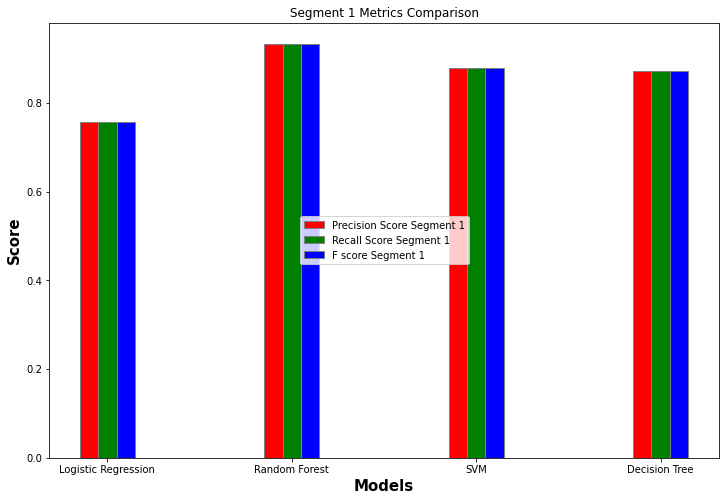

In [129]:
prec_seg1 = [precision_lr_seg1.mean(), precision_rf_seg1.mean(), precision_svm_seg1.mean(), precision_pd_seg1.mean()]
rec_seg1 = [recall_lr_seg1.mean(), recall_rf_seg1.mean(), recall_svm_seg1.mean(), recall_pd_seg1.mean()]
fsco_seg1 = [fscore_lr_seg1.mean(), fscore_rf_seg1.mean(), fscore_svm_seg1.mean(), fscore_pd_seg1.mean()]
#log_loss_seg1 = [ll_seg1_lr, ll_seg1_rf, ll_seg1_svm, ll_seg1_pd]

barWidth = 0.1
fig, ax = plt.subplots(figsize=(12, 8))
br1 = np.arange(len(prec_seg1))
plt.bar(br1, prec_seg1, color='r', width=barWidth, edgecolor='grey', label='Precision Score Segment 1')
plt.bar(br1 + barWidth, rec_seg1, color='g', width=barWidth, edgecolor='grey', label='Recall Score Segment 1')
plt.bar(br1 + 2 * barWidth, fsco_seg1, color='b', width=barWidth, edgecolor='grey', label='F score Segment 1')
#plt.bar(br1 + 3 * barWidth, log_loss_seg1, color='orange', width=barWidth, edgecolor='grey', label='Log Loss Segment 1')
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(prec_seg1))], ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'])
plt.legend(fontsize=10, loc='center')
plt.title("Segment 1 Metrics Comparison")
plt.show()

In [130]:
log_loss_seg1 = [ll_seg1_lr, ll_seg1_rf, ll_seg1_svm, ll_seg1_pd]

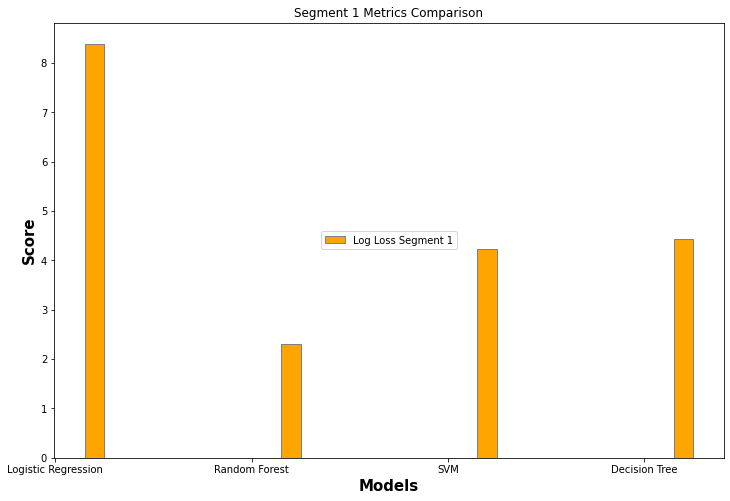

In [131]:
barWidth = 0.1
fig, ax = plt.subplots(figsize=(12, 8))
br1 = np.arange(len(prec_seg1))
#plt.bar(br1, prec_seg1, color='r', width=barWidth, edgecolor='grey', label='Precision Score Segment 1')
#plt.bar(br1 + barWidth, rec_seg1, color='g', width=barWidth, edgecolor='grey', label='Recall Score Segment 1')
#plt.bar(br1 + 2 * barWidth, fsco_seg1, color='b', width=barWidth, edgecolor='grey', label='F score Segment 1')
plt.bar(br1 + 3 * barWidth, log_loss_seg1, color='orange', width=barWidth, edgecolor='grey', label='Log Loss Segment 1')
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(prec_seg1))], ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'])
plt.legend(fontsize=10, loc='center')
plt.title("Segment 1 Metrics Comparison")
plt.show()

Segment 2

In [132]:
# For Segment 2
precision_lr_seg2, recall_lr_seg2, fscore_lr_seg2, support_lr_seg2 = score(y_test_seg2, y_pred_lr_seg2)
precision_rf_seg2, recall_rf_seg2, fscore_rf_seg2, support_rf_seg2 = score(y_test_seg2, y_pred_rf_seg2)
precision_svm_seg2, recall_svm_seg2, fscore_svm_seg2, support_svm_seg2 = score(y_test_seg2, y_pred_svm_seg2)
precision_pd_seg2, recall_pd_seg2, fscore_pd_seg2, support_pd_seg2 = score(y_test_seg2, y_pred_pd_seg2)

log_loss_seg2 = [
    log_loss(y_test_seg2, y_pred_lr_seg2),
    log_loss(y_test_seg2, y_pred_rf_seg2),
    log_loss(y_test_seg2, y_pred_svm_seg2),
    log_loss(y_test_seg2, y_pred_pd_seg2),
]

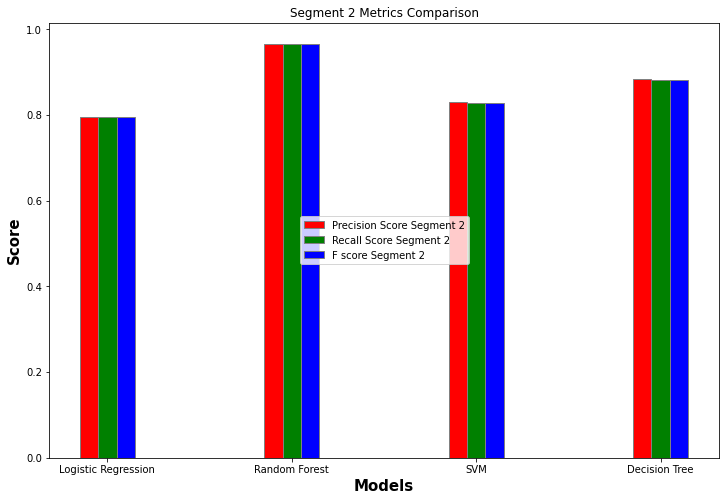

In [133]:
prec_seg2 = [precision_lr_seg2.mean(), precision_rf_seg2.mean(), precision_svm_seg2.mean(), precision_pd_seg2.mean()]
rec_seg2 = [recall_lr_seg2.mean(), recall_rf_seg2.mean(), recall_svm_seg2.mean(), recall_pd_seg2.mean()]
fsco_seg2 = [fscore_lr_seg2.mean(), fscore_rf_seg2.mean(), fscore_svm_seg2.mean(), fscore_pd_seg2.mean()]
#log_loss_seg2 = [ll_ib_lr_seg2, ll_ib_rf_seg2, ll_ib_svm_seg2, ll_ib_pd_seg2]

fig, ax = plt.subplots(figsize=(12, 8))
br1 = np.arange(len(prec_seg2))
plt.bar(br1, prec_seg2, color='r', width=barWidth, edgecolor='grey', label='Precision Score Segment 2')
plt.bar(br1 + barWidth, rec_seg2, color='g', width=barWidth, edgecolor='grey', label='Recall Score Segment 2')
plt.bar(br1 + 2 * barWidth, fsco_seg2, color='b', width=barWidth, edgecolor='grey', label='F score Segment 2')
#plt.bar(br1 + 3 * barWidth, log_loss_seg2, color='orange', width=barWidth, edgecolor='grey', label='Log Loss Segment 2')
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(prec_seg2))], ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'])
plt.legend(fontsize=10, loc='center')
plt.title("Segment 2 Metrics Comparison")
plt.show()

In [134]:
log_loss_seg2 = [ll_seg2_lr, ll_seg2_rf, ll_seg2_svm, ll_seg2_pd]

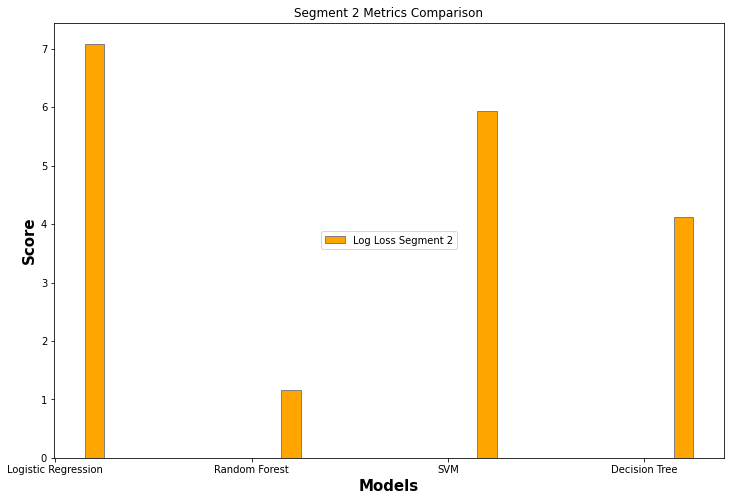

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))
br1 = np.arange(len(prec_seg2))
#plt.bar(br1, prec_seg2, color='r', width=barWidth, edgecolor='grey', label='Precision Score Segment 2')
#plt.bar(br1 + barWidth, rec_seg2, color='g', width=barWidth, edgecolor='grey', label='Recall Score Segment 2')
#plt.bar(br1 + 2 * barWidth, fsco_seg2, color='b', width=barWidth, edgecolor='grey', label='F score Segment 2')
plt.bar(br1 + 3 * barWidth, log_loss_seg2, color='orange', width=barWidth, edgecolor='grey', label='Log Loss Segment 2')
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(prec_seg2))], ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'])
plt.legend(fontsize=10, loc='center')
plt.title("Segment 2 Metrics Comparison")
plt.show()

Through comprehensive analysis, it becomes evident that predictions derived from a balanced dataset significantly outperform those from an unbalanced one. By further segmenting and clustering the data, the Random Forest model emerges as the optimal choice, particularly when applied to the distinct clusters. Thus, the most effective approach involves utilizing the Random Forest model on a carefully balanced and strategically clustered dataset, yielding the final and best model for this specific task.